In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (8, 4)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:


 # !pip install missingno  
# eksik verilerin yapısını ve dagılımını görselleştirir



In [9]:
import missingno as msno

<Axes: >

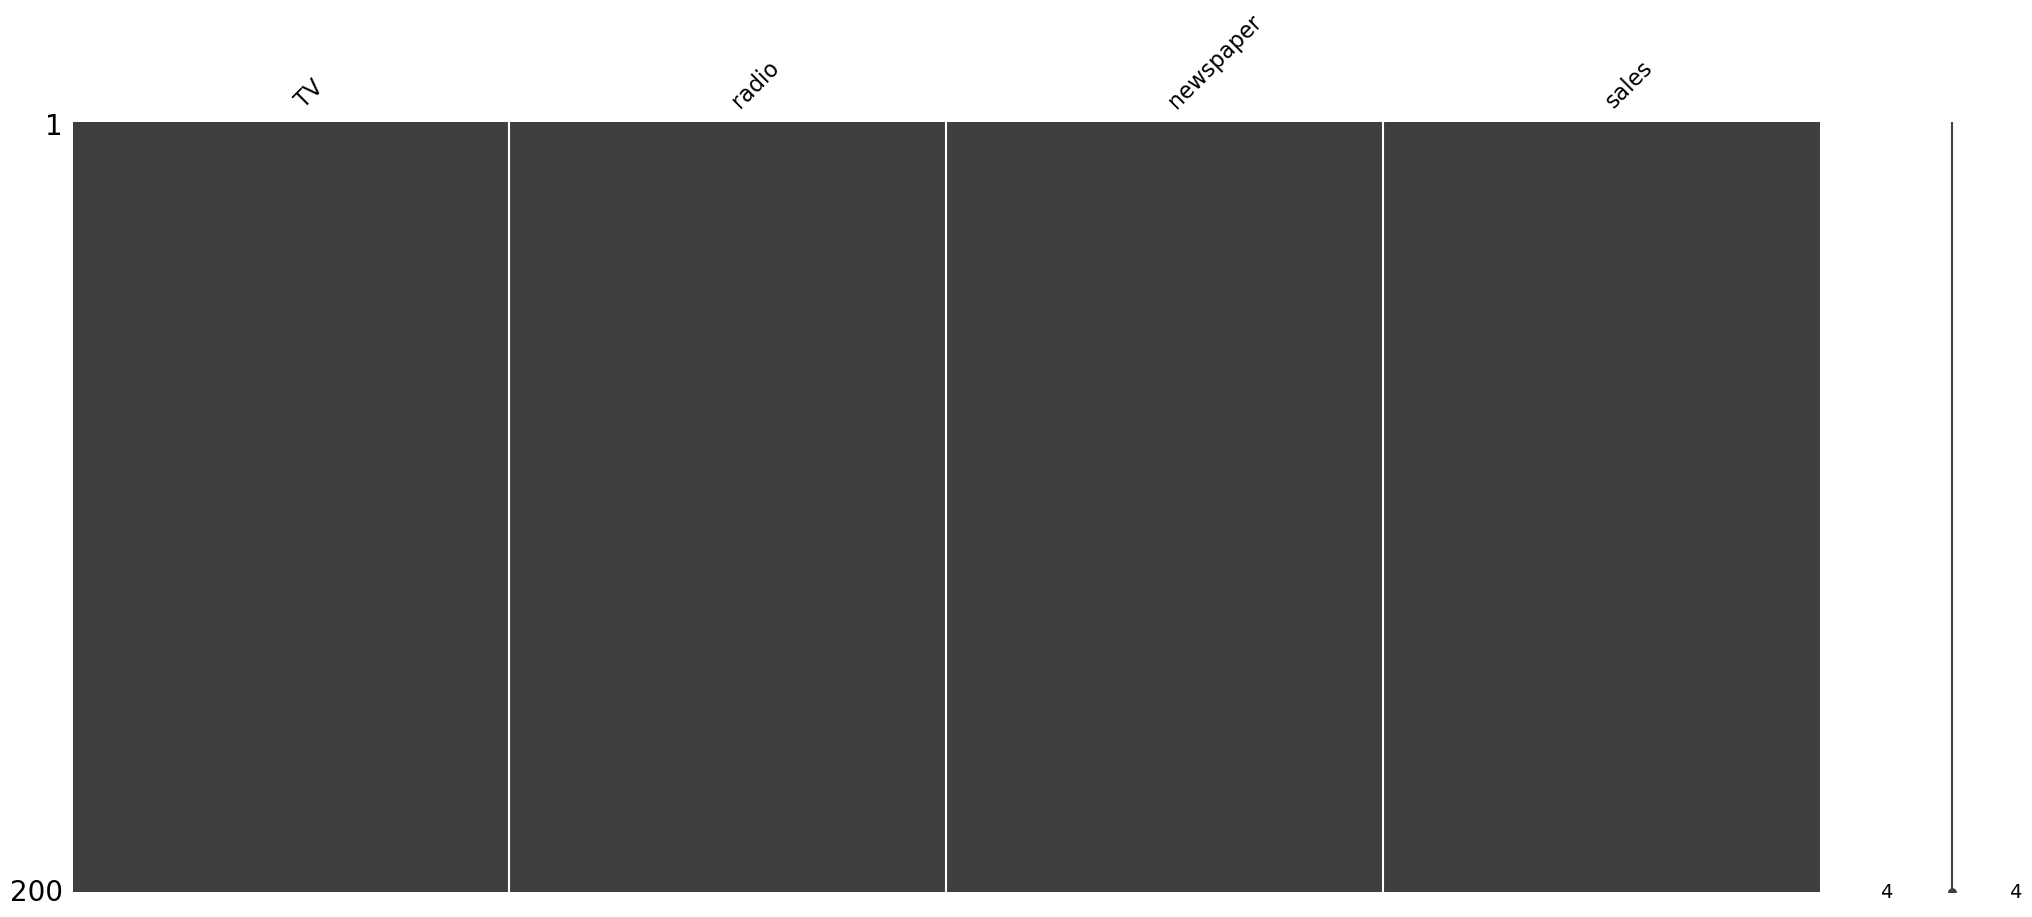

In [11]:
msno.matrix(df)

In [12]:
df.sort_values(by="sales",ascending=False)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
36,266.9,43.8,5.0,25.4
98,289.7,42.3,51.2,25.4
...,...,...,...,...
78,5.4,29.9,9.4,5.3
108,13.1,0.4,25.6,5.3
8,8.6,2.1,1.0,4.8
155,4.1,11.6,5.7,3.2


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [16]:
# !pip install summarytools

In [19]:
from summarytools import dfSummary
dfSummary(df)

ModuleNotFoundError: No module named 'summarytools'

In [20]:
# mean ve std değerlerinin birbirine yakınlığının Outlier tespitindeki önemini //
# // bir örnek ile değerlendirelim   (NB akışına bir parantez açalım)

print ( np.mean([100,110,120,115]))
print ( np.std([100,110,120,115]))

111.25
7.39509972887452


In [21]:
print ( np.mean([100,110,120,700]))
print ( np.std([100,110,120,700]))

257.5
255.57533136044253


In [22]:
print ( np.mean([100,110,120,900]))
print ( np.std([100,110,120,900]))

307.5
342.153109002388


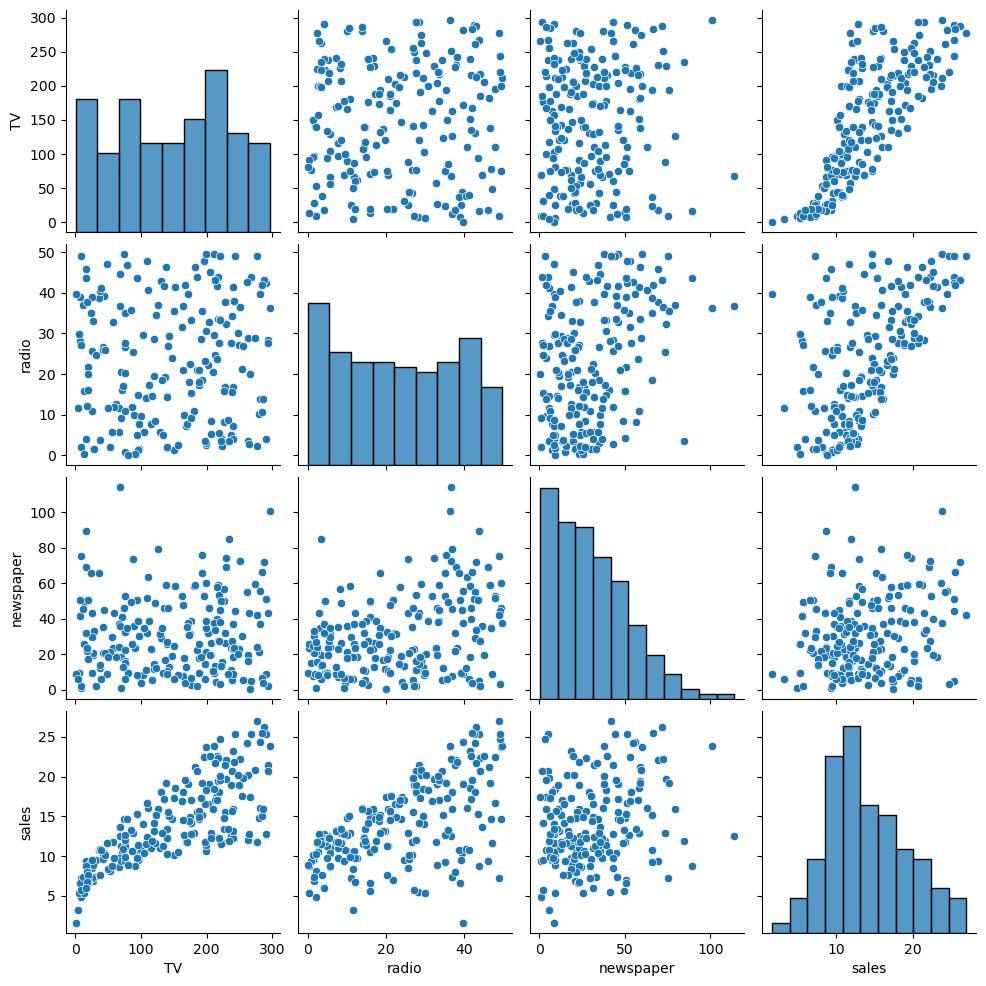

In [23]:
sns.pairplot(df)

<Axes: >

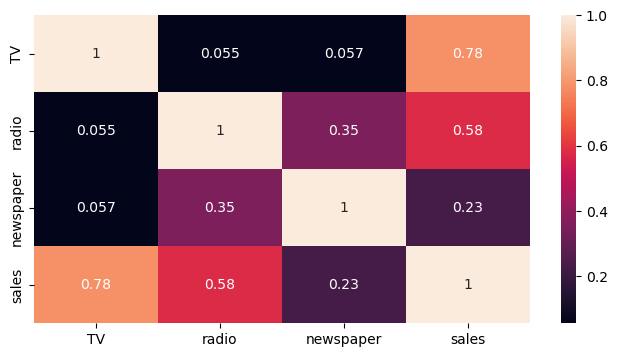

In [24]:
sns.heatmap(df.corr(),annot=True)

In [25]:
from scipy.stats import skew

In [26]:
for i in df.drop(columns = "sales").columns:
    print(i, skew(df[i]))

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


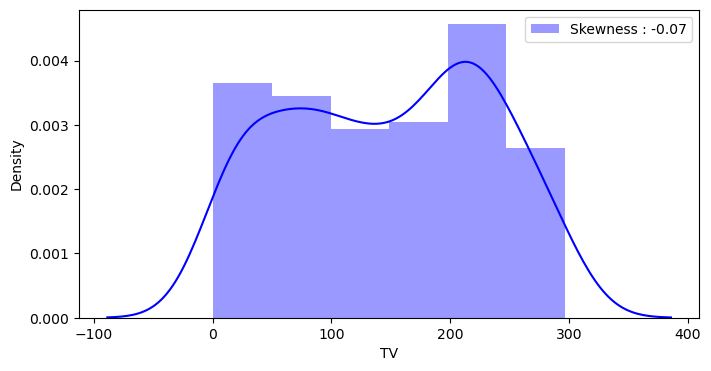

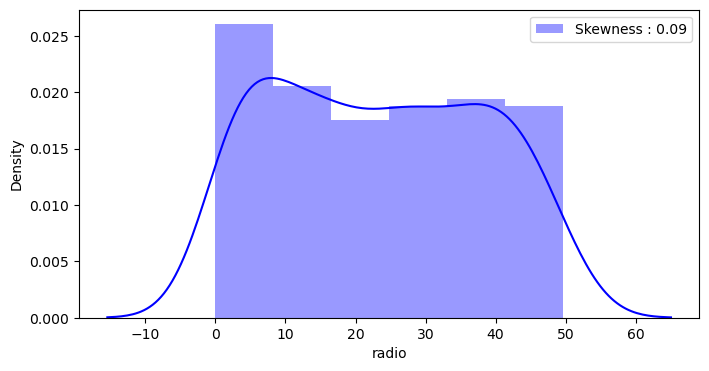

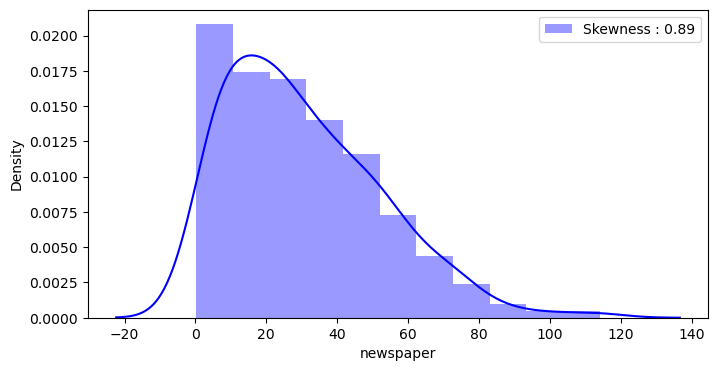

In [27]:
for j in df.drop(columns = "sales").columns:     #"sales" sütunu dataframe'den kaldırılıyor
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))   #  j sütununa ait veri dağılımı grafiği çiziliyor. grafiğin üzerinde gösterilen etiketi oluşturur. Etiket, o sütunun çarpıklık değerini (skewness) içerir
    g = g.legend(loc= "best")   #  grafiğin üzerine eklenen etiketin konumunu en iyi yere yerleştirmes
    plt.show()

In [28]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [29]:
# !pip install ydata-profiling

In [30]:
# load the ydata_profiling package
from ydata_profiling import ProfileReport

ModuleNotFoundError: No module named 'ydata_profiling'

In [33]:
# use ProfileReport
pr_df = ProfileReport(df)

NameError: name 'ProfileReport' is not defined

In [32]:


# ML için kullanılan kütüphane Scikit-Learn kütüphanesidir

# !pip install scikit-learn 
# !pip install sklearn



In [34]:
X = df.drop(columns="sales")
y = df["sales"]

print(X,y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [35]:
from sklearn.model_selection import train_test_split